# QMNIST classification and model analysis with confusion matrix

## QMNIST dataset
You are not required but encouraged to read the paper about QMNIST dataset: https://arxiv.org/pdf/1905.10498.pdf

## Outline:

1. Prepare your data

2. Print data

3. Create Linear classifier

4. Create Non-linear classifier

5. Train created models using QMNIST data

6. Visualize learned filters from Linear and Non-linear model

7. Report test accuracy of both models and analyze confusion matrices

## 1. Prepare your data

We have prepared the pickle file which can be downloaded using the link below.

The pickle file is a dict with the keys representing train / test data and labels.

It should be pretty similar to MNIST code we used in the lab.

In [2]:
#import dependencies
%matplotlib widget
%matplotlib inline

import numpy
import matplotlib.pyplot as plot
import pickle
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
#random seed
random_seed = 12345

In [4]:
# downloading code for you
#! wget https://nyu.box.com/shared/static/4914fnt7z3obeupe9xyn7idzz9rsjg4x.pkl -O ./qmnist.pkl


qmnist = pickle.load(open("./qmnist.pkl","rb"))

# check the keys of the dict in pickle file
print(qmnist.keys())
# prepare your data
# put your code here...

train_data = qmnist['train_data']
train_labels = qmnist['train_labels']

test_data = qmnist['test_data']
test_labels = qmnist['test_labels']
print(test_labels)

dict_keys(['train_data', 'train_labels', 'test_data', 'test_labels'])
[3 8 9 ... 5 5 4]


## 2. Print data

Print five examples from the training part of QMNIST. Feel free to reuse the code from the lab

In [4]:
#Visualization routine, reusing code from the lab
#this one only prints 5 examples, though
def print_data(train_data, train_labels):
    fig, axes = plot.subplots(5, 1, figsize=(6, 6))
    fig.tight_layout()

    for i in range(5):
        idx = i
        axes[i].set_title(train_labels[idx])
        axes[i].imshow(train_data[idx].reshape(28, 28), cmap='gray')
        axes[i].axis('off')

    plot.show()
    

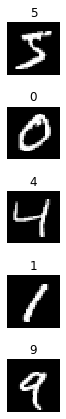

In [5]:
# put your code here ...
print_data(train_data, train_labels)

## 3. Create *Linear* classfier using sklearn

Create a model with sklearn. It is your task to find out the correct module to use.

**Hint:** google `sklearn softmax classifier` to find out some related references. Do not use svm, try logistic regression.

**Attention:** you must create the multi-class classifier model.

In [6]:
#put your code here
#multi-class parameter set to "multinomial" so that a softmax classifier is used.
clf = LogisticRegression(tol = 1e-3,random_state = random_seed,solver='lbfgs',multi_class="multinomial")

## 4. Create *Non-linear* classifier using sklearn

Create a model with sklearn. It is your task to find out the correct module to use.

**Hint:** google `sklearn neural network` to find out some related references. Do not use svm, try neural network. Use any reasonable hyper-parameter for hidden size and number of layers to keep it running fast enough on your laptop etc.



In [7]:
# put your code here
brain = MLPClassifier(solver = 'adam',random_state = random_seed,alpha = 1e-5,hidden_layer_sizes = (100,))

## 5. Train created models using QMNIST data

Train your model using `.fit()` function.

**Attention:** to get full points you need to get `>90%` accuracy on 50k test set.

Make sure that accuracy value is saved in the output of the cell.

In [8]:
# put your code here
clf.fit(train_data, train_labels)
print("Accuracy of linear model is %f"%clf.score(test_data,test_labels))
brain.fit(train_data,train_labels)
print("Accuracy of neural network is %f"%brain.score(test_data, test_labels))

/Users/owenjones/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy of linear model is 0.918940
Accuracy of neural network is 0.962100


## 6. Visualize learned filters from Linear and Non-linear model

Visualize filters (learned weights) similar to what you saw in lab. Sklearn docs have some examples of doing this for non-linear model. For non-linear model you can represent some rows from the first layer of the neural network (since there are more than 10 of such rows, you can use first 10 rows).

Softmax Classifier weights visualized:


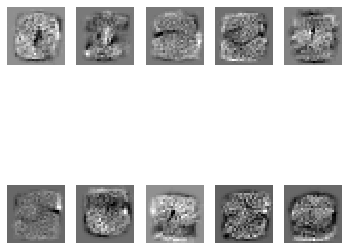

First 10 Neural Network weights visualized:


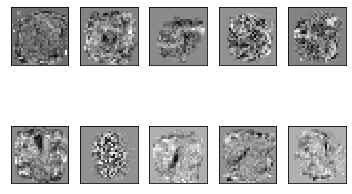

In [9]:
# put your code here

def vis_softmax(clf):
    fig, axes = plot.subplots(2, 5,figsize=(6,6))
    for i in range(2):
        for j in range(5):
            idx = j + i * 5
            axes[i, j].imshow(clf.coef_[idx].reshape(28, 28), cmap='gray')
            axes[i, j].axis('off')

    plot.show()

#visualize a neural net. prints the first 10 rows of weights from the first layer.
#used some code from scikit learn docs
def vis_neural(mlp):
    fig, axes = plot.subplots(2,5 )
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
    for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
        ax.imshow(coef.reshape(28, 28), cmap=plot.cm.gray)
        ax.set_xticks(())
        ax.set_yticks(())
print("Softmax Classifier weights visualized:")
vis_softmax(clf)
print("First 10 Neural Network weights visualized:")
vis_neural(brain)

## 7. Report test accuracy of both models and analyze confusion matrices

Get the accuracy using `.score()` function (**using test data**).

**Attention:** to get full points:

1. You need to get *`>90%`* accuracy on 50k test set. 
2. Non-linear model should give better performance (think why).

Make sure that accuracy value **is saved in the output** of the cell.

For confusion matrix, use `sklearn.metrics.confusion_matrix`

Firstly, compute confusion matrix using your model and test data.

Then, given the defition:
```
By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
```

Estimate what is the most confusing pair (i -> j) of classes for you model (write code for that!).

You will notice that confusing pair usually has similar digits '' on average '' e.g. 1 and 7 or 7 and 9

In [10]:
#Note that, conveniently, the indices are identical to the class names (0-9)
#thus we return the indices of the maximal confusing pair
def max_confusing(C):
    max_i,maxj,freq = 0,0,0
    for i in range(len(C)):
        for j in range(len(C[i])):
            if i != j and C[i][j] > freq:
                max_i,max_j,freq = i,j,C[i][j]
    return max_i,max_j,freq


C = confusion_matrix(test_labels,clf.predict(test_data))
cmax_i,cmax_j,cfreq = max_confusing(C)

D = confusion_matrix(test_labels,brain.predict(test_data))
dmax_i, dmax_j,dfreq = max_confusing(D)

#put it into a pandas data frame to label axes

print("Linear Model: Accuracy is  %f"%clf.score(test_data,test_labels))
print(pd.DataFrame(C))
print("\nIn the linear model, (%d -> %d) is the most confusing pair with frequency:%d\n"%(cmax_i,cmax_j,cfreq))

print("Neural Network: Accuracy is %f"%brain.score(test_data, test_labels))
print(pd.DataFrame(D))
print("\nIn the neural network, (%d -> %d) is the most confusing pair with frequency: %d\n"%(dmax_i, dmax_j, dfreq))

Linear Model: Accuracy is  0.918940
      0     1     2     3     4     5     6     7     8     9
0  4772     0    20    16    12    34    47    14    47    10
1     1  5535    26    11     1     7     8     5    56     6
2    14    59  4504    72    47    26    58    33   154    27
3    12    13   148  4510     6   168    12    29   132    44
4    10    16    29     6  4475    10    50    20    27   155
5    68    38    27   161    51  3933    60    19   158    47
6    57    14    42     3    43    74  4725     5    33     3
7    11    23    68    26    44     2     0  4836    20   173
8    29   102    65   126    47   133    23    17  4311    63
9    24    24    18    59   155    27     3   114    56  4346

In the linear model, (7 -> 9) is the most confusing pair with frequency:173

Neural Network: Accuracy is 0.962100
      0     1     2     3     4     5     6     7     8     9
0  4807     1    22     1     7     7    30     4    43    50
1     0  5601    12     7     2     1     8

# BONUS 2 points

Train Non-linear model with a different initialization (make sure that random seed is different) and compare the most confusing pair with the first trained model. Is it different? Provide some argument why it can be different.

In [11]:
#trained the nonlinear model with a different random state variable
mlp = MLPClassifier(solver = 'adam',random_state = 123456,alpha = 1e-5,hidden_layer_sizes = (100,))
mlp.fit(train_data, train_labels)

E = confusion_matrix(test_labels, mlp.predict(test_data))
emax_i, emax_j,efreq = max_confusing(E)

print("Other Neural Network: Accuracy is %f"%mlp.score(test_data,test_labels))
print(pd.DataFrame(E))
print("\nIn the other neural network, (%d -> %d) is the most confusing pair with frequency: %d\n"%(emax_i, emax_j, efreq))

Other Neural Network: Accuracy is 0.962480
      0     1     2     3     4     5     6     7     8     9
0  4876     8    24     3     5    15    14     2    13    12
1     1  5584    28     2     1     8    11     8     9     4
2    14    10  4835    35    27     4    10    26    26     7
3     9     3    99  4840     2    64     2     9    23    23
4     5    10    11     0  4658     0    30    19     6    59
5    16     8    20    67     2  4331    50     6    19    43
6    44     6     7     0    24    30  4880     0     6     2
7     7    11    51    14    24     6     0  5029     3    58
8    27    40    47   109    19    67    43    11  4496    57
9    21     7     5    34    61    25     2    48    28  4595

In the other neural network, (8 -> 3) is the most confusing pair with frequency: 109



The minimal weights found by the solver function during the learning process largely depend on the starting $w$ (or in the case of a neural network, on the multiple starting $w_i$'s). We know that solver functions attempt to minimize one or several cost functions by repeatedly modifying values of the weights until some stopping criteria is met. These solvers do not guarantee an absolute minimum, and can stop after a certain number of iterations occur, after cost is below a certain level of tolerance, after a local minimum is found, etc.

Therefore, when two separate (randomly chosen) starting vectors are used in two separate runs of the learning algorithm, as they begin randomly spread out, it is extremely likely that they start off with very different values and each ends, for any of the reasons mentioned above, on different values of $w$ for each weight vector at each neuron.
    
    
Different values of $w$ will behave differently, and so while both models may have very similar accuracy rates, the actual values they output when dotted with input vectors will be different, meaning many points will not be classified, or miss-classified, in the same way by both models.
    
    
As a result, corresponding frequencies found in each's confusion matrix, while similar(especially along the diagonal, where the correctly classified points are), differ somewhat, causing the noticed discrepancy in maximal confusing pairs between the two non-linear models.

    

# THE END

plese carefully check that all numbers / pics you produced are saved.